In [27]:
#  기본
import  numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')

# 시각화
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm as cm    
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib import font_manager
import seaborn as sns 

In [138]:
bus = pd.read_csv("https://raw.githubusercontent.com/euknow/Data/main/df_seoul_bus_station.csv")
business = pd.read_csv("https://raw.githubusercontent.com/euknow/Data/main/df_seoul_business.csv")
moving = pd.read_csv("https://raw.githubusercontent.com/euknow/Data/main/df_seoul_moving.csv", encoding="cp949")
people = pd.read_csv("https://raw.githubusercontent.com/euknow/Data/main/df_seoul_people.csv")

In [139]:
moving

,Unnamed: 0,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,0,11010,29797989,21031880.41,60.903702,42.986773
1,1,11020,29871978,22491167.48,59.909546,45.107011
2,2,11030,27170933,15702426.81,59.739050,34.523955
3,3,11040,27556207,18138400.81,59.495957,39.162194
4,4,11050,27336591,18876549.38,62.520935,43.172154
5,5,11060,28861672,18143542.26,61.684211,38.777036
6,6,11070,25502247,14809957.70,65.605698,38.099294
7,7,11080,28796293,20096899.66,61.968824,43.247971
8,8,11090,24756229,13182652.17,67.274921,35.823787
9,9,11100,22523029,11173779.54,69.232395,34.346514


In [130]:
data = {
"11010": "종로구",
"11020": "중구",
"11030": "용산구",
"11040": "성동구",
"11050": "광진구",
"11060": "동대문구",
"11070": "중랑구",
"11080": "성북구",
"11090": "강북구",
"11100": "도봉구",
"11110": "노원구",
"11120": "은평구",
"11130": "서대문구",
"11140": "마포구",
"11150": "양천구",
"11160": "강서구",
"11170": "구로구",
"11180": "금천구",
"11190": "영등포구",
"11200": "동작구",
"11210": "관악구",
"11220": "서초구",
"11230": "강남구",
"11240": "송파구",
"11250": "강동구"
}

# Create a new dictionary with the keys as integers without the quotation marks
new_data = {int(key): value for key, value in data.items()}
new_data

{11010: '종로구',
 11020: '중구',
 11030: '용산구',
 11040: '성동구',
 11050: '광진구',
 11060: '동대문구',
 11070: '중랑구',
 11080: '성북구',
 11090: '강북구',
 11100: '도봉구',
 11110: '노원구',
 11120: '은평구',
 11130: '서대문구',
 11140: '마포구',
 11150: '양천구',
 11160: '강서구',
 11170: '구로구',
 11180: '금천구',
 11190: '영등포구',
 11200: '동작구',
 11210: '관악구',
 11220: '서초구',
 11230: '강남구',
 11240: '송파구',
 11250: '강동구'}

In [131]:
moving["도착 시군구 코드"]= moving[["도착 시군구 코드"]].replace(new_data)
moving

,Unnamed: 0,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,0,종로구,29797989,21031880.41,60.903702,42.986773
1,1,중구,29871978,22491167.48,59.909546,45.107011
2,2,용산구,27170933,15702426.81,59.739050,34.523955
3,3,성동구,27556207,18138400.81,59.495957,39.162194
4,4,광진구,27336591,18876549.38,62.520935,43.172154
5,5,동대문구,28861672,18143542.26,61.684211,38.777036
6,6,중랑구,25502247,14809957.70,65.605698,38.099294
7,7,성북구,28796293,20096899.66,61.968824,43.247971
8,8,강북구,24756229,13182652.17,67.274921,35.823787
9,9,도봉구,22523029,11173779.54,69.232395,34.346514


In [132]:
df1 = pd.merge(bus,business)
df2 = pd.merge(df1, moving, left_on="자치구", right_on="도착 시군구 코드",how="inner").drop(["Unnamed: 0", "도착 시군구 코드"],axis=1)
df3 = pd.merge(df2, people, left_on="자치구", right_on="동별(2)", how="inner").drop("동별(2)", axis=1)

In [133]:
list(df3.set_index("자치구")["총 이동 인구"].values)

[48940779.91,
 22933052.84,
 13182652.17,
 24207692.63,
 20121366.16,
 18876549.38,
 16271104.2,
 8864186.53,
 21427712.9,
 11173779.54,
 18143542.26,
 17387987.32,
 25683914.3,
 18112647.3,
 31568695.73,
 18138400.81,
 20096899.66,
 37668693.82,
 15319155.39,
 26938651.07,
 15702426.81,
 17488651.91,
 21031880.41,
 22491167.48,
 14809957.7]

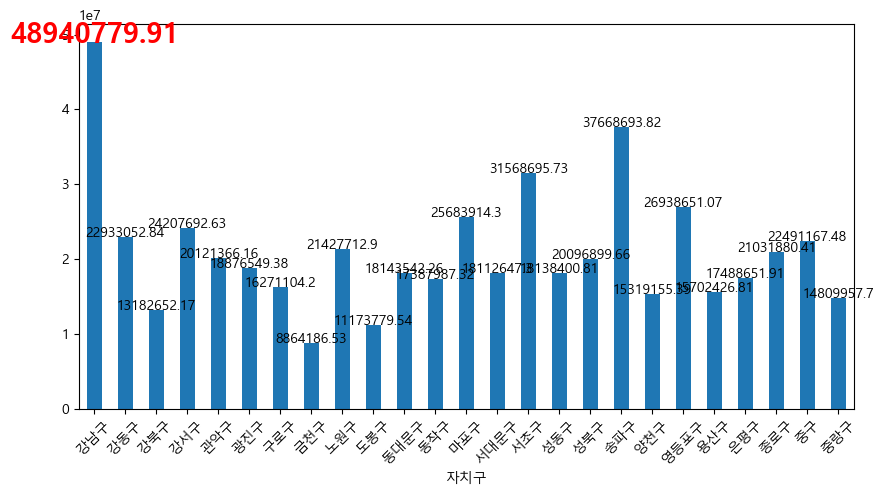

In [141]:
#한글깨짐 해결
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

plt.figure(figsize=(10,5))
df3.set_index("자치구")["총 이동 인구"].plot.bar()
plt.xticks(rotation=45)


pop_list = list(df3.set_index("자치구")["총 이동 인구"].values)
pop_max = max(pop_list)
max_index = pop_list.index(pop_max)

for i, value in enumerate(list(df3.set_index("자치구")["총 이동 인구"].values)):
    if i == max_index :
        plt.text(i, value, value, ha="center", color="red", fontdict={"weight":"bold", "size":20})
    
    else:
        plt.text(i, value, value, ha="center")

In [135]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

0.14.0


In [142]:
json_add = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json" 

m = folium.Map(location=[37.562225, 126.978555], tiles="cartodbpositron", zoom_start=11)

m.choropleth(
    geo_data = json_add,
    name = "총 이동 인구 ",
    data = df3,
    columns = ["자치구","총 이동 인구"],
     key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = "Moving")

folium.LayerControl(collapsed=False).add_to(m)


m

In [136]:
json_add = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json" 

m = folium.Map(location=[37.562225, 126.978555], tiles="cartodbpositron", zoom_start=11)

m.choropleth(
    geo_data = json_add,
    name = "총 이동 인구 ",
    data = df3,
    columns = ["자치구","총 이동 인구"],
     key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = "Moving")

m.choropleth(
    geo_data = json_add,
    name = "정류장 수",
    data = df3,
    columns = ["자치구","정류장수"],
     key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'blue',
    legend_name = "정류장수")

folium.LayerControl(collapsed=False).add_to(m)


m